<a href="https://colab.research.google.com/github/sipocz/XLS_Conv/blob/main/xls_converter_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [349]:
import os

In [350]:
class XLS_timeseries:
    import pandas as pd
    import os
    def __init__(self,fname=""):
        if fname=="":
            return 
        self.readfile(fname)

    def readfile(self,fname):
        from pandas import ExcelFile
        self.tabs = ExcelFile(fname).sheet_names 
        self.fname=fname
    
    def __str__(self):
        return(f"file name:{self.fname}, sheets: {self.tabs}")


        
    
    def get_data1s(self,sheet_name):
        import pandas as pd
        fname=self.fname
        df=pd.read_excel(fname,sheet_name=sheet_name)
        df.columns=["Date","Value","Status"]
        bad_data=df[df["Status"]=="Bad Data"].index
        df.drop(index=bad_data,inplace=True)
        df.dropna(inplace=True)
        df.index=df.Date
        df.set_index("Date",inplace=True)
        df.drop(columns=["Status"], inplace=True)
        dfout=df.resample("1s").mean()
        dfout.interpolate('linear',inplace=True)
        self.df_base=dfout
        return(dfout)
    
    def df_list(self):
        fname=self.fname
        tabs=self.tabs
        self.out_df_list=[]
        for tabx in tabs:
            dftab=self.get_data1s(tabx)
            #dftab.plot()
            self.out_df_list.append(dftab)
        return self.out_df_list 
    
    
    def df_concat(self):
        from pandas import concat
        dflist=self.out_df_list
        df_heads=self.tabs
        for index,name in enumerate(df_heads):
            dflist[index].columns=[name]
        out_df=concat(dflist,axis=1)
    #out_df.head=df_heads
        out_df.dropna(inplace=True)
        self.DF=out_df
        return(out_df)
    
    def plot(self,index):
        if not (set(index).issubset(set(self.tabs))):
            return ("Key subset not found!")
        if len(self.DF.columns)<1:
            return
        plots=self.DF[index].plot()
        return plots

    def plotter(self,columnlist,colorlist=["b","r"]):
        import matplotlib.pyplot as plt
        df=self.DF
        plt.figure()
        plt.figure(figsize=(20,10))
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=14)
        plt.xlabel('time',fontsize=20)
        plt.ylabel(columnlist,fontsize=20)
        plt.title(f"{columnlist} vs. time",fontsize=20)
        targets = columnlist
    
        
        plt.scatter(df.index,df[columnlist[0]] , c = colorlist[0], s = 1,)
        plt.scatter(df.index,df[columnlist[1]] , c = colorlist[1], s = 1,)
    
        #plt.colorbar()
        plt.legend(targets,prop={'size': 20})


In [351]:
!rm *.xlsx*
urlname="https://github.com/sipocz/XLS_Conv/raw/main/U113_20210607.xlsx"
_,fname= os.path.split(urlname)
!wget $urlname

--2021-09-27 20:05:52--  https://github.com/sipocz/XLS_Conv/raw/main/U113_20210607.xlsx
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/XLS_Conv/main/U113_20210607.xlsx [following]
--2021-09-27 20:05:53--  https://raw.githubusercontent.com/sipocz/XLS_Conv/main/U113_20210607.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5661857 (5.4M) [application/octet-stream]
Saving to: ‘U113_20210607.xlsx’

U113_20210607.xlsx  100%[===================>]   5.40M  --.-KB/s    in 0.09s   

2021-09-27 20:05:53 (58.9 MB/s) - ‘U113_20210607.xlsx’ saved [5661857/5661857]



In [352]:
a=XLS_timeseries(fname)

In [353]:
a.readfile(fname)

In [354]:
a.tabs

['AS_P113B',
 'AS_PH113',
 'AS_T113F',
 'AS_T1131',
 'AS_T1132',
 'AS_T1133',
 'AS_T1134',
 'AS_T1135']

In [355]:
a.get_data1s(a.tabs[0])

,Value
Date,
2021-06-07 00:00:21,0.113756
2021-06-07 00:00:22,0.114282
2021-06-07 00:00:23,0.114809
2021-06-07 00:00:24,0.115335
2021-06-07 00:00:25,0.115862
...,...
2021-06-11 23:59:38,0.085145
2021-06-11 23:59:39,0.085145
2021-06-11 23:59:40,0.085145


In [356]:
a.df_base.head()

,Value
Date,
2021-06-07 00:00:21,0.113756
2021-06-07 00:00:22,0.114282
2021-06-07 00:00:23,0.114809
2021-06-07 00:00:24,0.115335
2021-06-07 00:00:25,0.115862


In [357]:
print(a)

file name:U113_20210607.xlsx, sheets: ['AS_P113B', 'AS_PH113', 'AS_T113F', 'AS_T1131', 'AS_T1132', 'AS_T1133', 'AS_T1134', 'AS_T1135']


In [358]:
a.df_list()

[                        Value
 Date                         
 2021-06-07 00:00:21  0.113756
 2021-06-07 00:00:22  0.114282
 2021-06-07 00:00:23  0.114809
 2021-06-07 00:00:24  0.115335
 2021-06-07 00:00:25  0.115862
 ...                       ...
 2021-06-11 23:59:38  0.085145
 2021-06-11 23:59:39  0.085145
 2021-06-11 23:59:40  0.085145
 2021-06-11 23:59:41  0.085145
 2021-06-11 23:59:42  0.085145
 
 [431962 rows x 1 columns],                         Value
 Date                         
 2021-06-07 00:00:25  9.144274
 2021-06-07 00:00:26  9.144369
 2021-06-07 00:00:27  9.144464
 2021-06-07 00:00:28  9.144560
 2021-06-07 00:00:29  9.144655
 ...                       ...
 2021-06-11 23:59:38  9.643396
 2021-06-11 23:59:39  9.643778
 2021-06-11 23:59:40  9.644159
 2021-06-11 23:59:41  9.644541
 2021-06-11 23:59:42  9.644922
 
 [431958 rows x 1 columns],                          Value
 Date                          
 2021-06-07 00:00:25  33.756008
 2021-06-07 00:00:26  33.757915
 2021-06

In [359]:
a.df_concat()

,AS_P113B,AS_PH113,AS_T113F,AS_T1131,AS_T1132,AS_T1133,AS_T1134,AS_T1135
Date,,,,,,,,
2021-06-07 00:00:36,0.119020,9.145323,33.776989,31.960022,32.038223,31.925690,31.499809,32.794689
2021-06-07 00:00:37,0.119020,9.145418,33.778896,31.960022,32.029449,31.925690,31.492790,32.794689
2021-06-07 00:00:38,0.119020,9.145514,33.780804,31.960022,32.020676,31.925690,31.485771,32.794689
2021-06-07 00:00:39,0.119020,9.145609,33.782711,31.960022,32.011902,31.925690,31.478751,32.794689
2021-06-07 00:00:40,0.119020,9.145704,33.784618,31.960022,32.003128,31.925690,31.471732,32.794689
...,...,...,...,...,...,...,...,...
2021-06-11 23:59:38,0.085145,9.643396,39.255360,36.182953,33.836121,25.543602,37.393761,39.114975
2021-06-11 23:59:39,0.085145,9.643778,39.255360,36.182953,33.844894,25.543602,37.393761,39.114975
2021-06-11 23:59:40,0.085145,9.644159,39.255360,36.182953,33.853668,25.543602,37.393761,39.114975


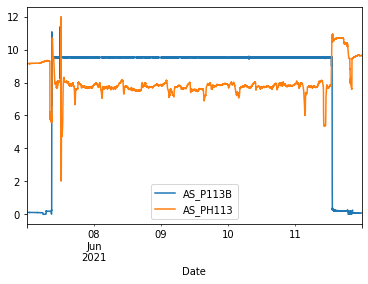

In [360]:
plot1=a.plot(["AS_P113B","AS_PH113"]);

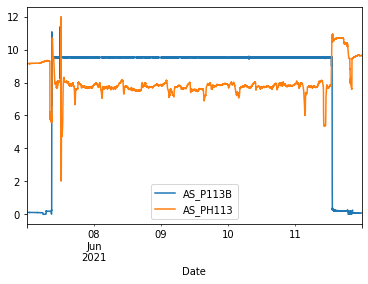

In [361]:
a.DF[["AS_P113B","AS_PH113"]].plot()

In [368]:
def plotter(df,columnlist,colorlist):
    import matplotlib.pyplot as plt
    plt.figure()
    plt.figure(figsize=(30,10))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel('time',fontsize=20)
    plt.ylabel(columnlist,fontsize=20)
    plt.title(f"{columnlist} vs. time",fontsize=20)
    targets = columnlist
    
    color = df.loc[:, colorlist].values
    plt.scatter(df.index,df[columnlist[0]] , c = "b", s = 0.5,)
    plt.scatter(df.index,df[columnlist[1]] , c = "r", s = 0.5,)
    
    #plt.colorbar()
    plt.legend(targets,prop={'size': 20})

<Figure size 432x288 with 0 Axes>

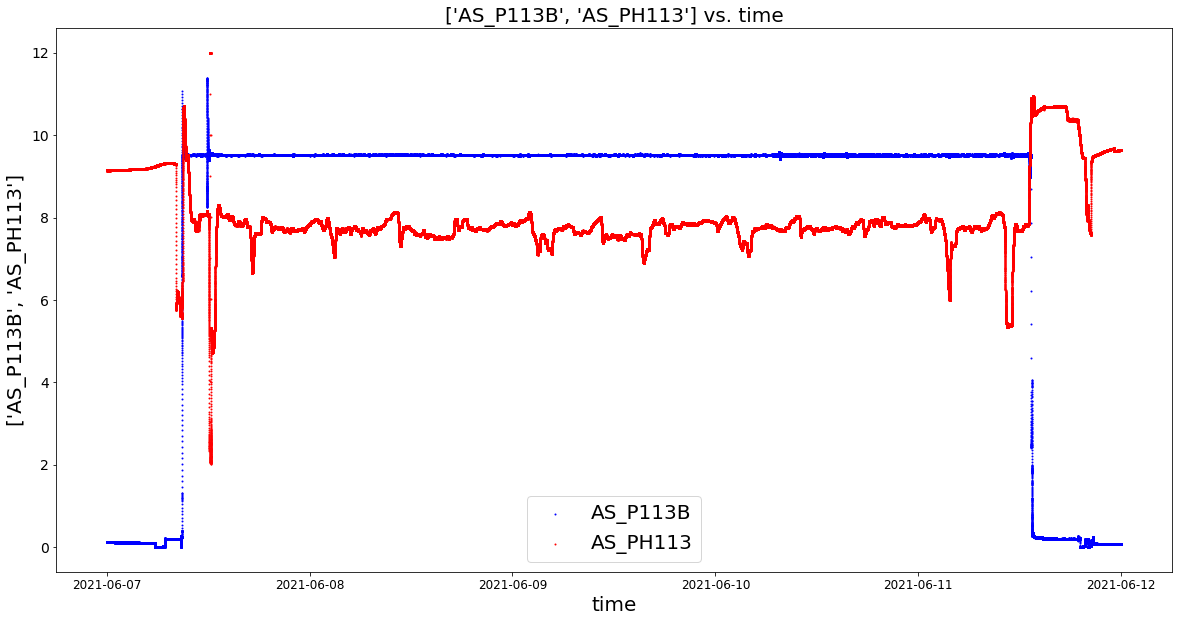

In [363]:
a.plotter(["AS_P113B","AS_PH113"])

<Figure size 432x288 with 0 Axes>

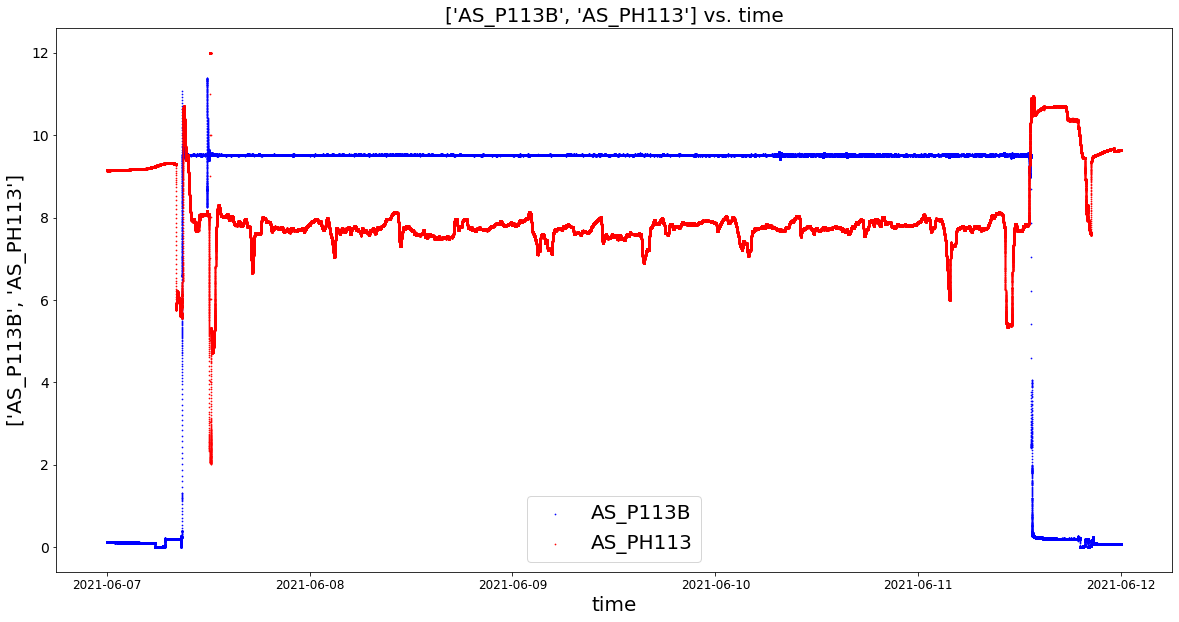

In [369]:
plotter(a.DF,["AS_P113B","AS_PH113"],["AS_PH113"]) 

In [365]:
import nltk
nltk.download('words')
from nltk.corpus import words
word_list = words.words()
# prints 236736
print (len(word_list))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
236736


In [366]:
pytho=[a for a in word_list if a.startswith("rop")]

In [367]:
pytho

['ropable',
 'rope',
 'ropeable',
 'ropeband',
 'ropebark',
 'ropedance',
 'ropedancer',
 'ropedancing',
 'ropelayer',
 'ropelaying',
 'ropelike',
 'ropemaker',
 'ropemaking',
 'ropeman',
 'roper',
 'roperipe',
 'ropery',
 'ropes',
 'ropesmith',
 'ropetrick',
 'ropewalk',
 'ropewalker',
 'ropeway',
 'ropework',
 'ropily',
 'ropiness',
 'roping',
 'ropish',
 'ropishness',
 'ropp',
 'ropy']

In [380]:
print(os.environ)

environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '11.1.1', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.7.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '8.0.5.39', 'LAST_FORCED_REBUILD': '20210824', 'JPY_PARENT_PID': '52', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}', 'ENV': '/root/.bashrc', 'GLIBCXX_FORCE_NEW

In [393]:
!alfa="hello"
!export alfa="hello"

In [396]:
!set

BASH=/bin/bash
BASHOPTS=cmdhist:complete_fullquote:extquote:force_fignore:hostcomplete:interactive_comments:progcomp:promptvars:sourcepath
BASH_ALIASES=()
BASH_ARGC=()
BASH_ARGV=()
BASH_CMDS=()
BASH_EXECUTION_STRING=set
BASH_LINENO=()
BASH_SOURCE=()
BASH_VERSINFO=([0]="4" [1]="4" [2]="20" [3]="1" [4]="release" [5]="x86_64-pc-linux-gnu")
BASH_VERSION='4.4.20(1)-release'
CLICOLOR=1
CLOUDSDK_CONFIG=/content/.config
CLOUDSDK_PYTHON=python3
COLAB_GPU=0
CUDA_VERSION=11.1.1
CUDNN_VERSION=8.0.5.39
DATALAB_SETTINGS_OVERRIDES='{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\"172.28.0.2\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}'
DEBIAN_FRONTEND=noninteractive
DIRSTACK=()
ENV=/root/.bashrc
EUID=0
GCE_METADATA_TIMEOUT=0
GCS_READ_CACHE_BLOCK_SIZE_MB=16
GIT_PAGER=cat
GLIBCPP_FORCE_NEW=1
GLIBCXX_FORCE_NEW=1
GROUPS=()
HOME=/root
HOSTNAME=65a93a0fb6a3
HOSTTYPE=x86_64
IFS=$' \t\n'
JPY_PARENT_PID=52
KMP_DUPLICATE_LIB_OK=

In [392]:
print(os.environ["alfa"])

KeyError: ignored

In [384]:
!printenv NO_GCE_CHECK

True
